In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

import os
import os.path as osp
from google.colab import drive

In [3]:
cd ./drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
G = nx.DiGraph()
path_data = './data/lab/lab4/simple_weighted_directed_graph.txt'

f = open(path_data)
for line in f:
  line_split = line.split()
  src = int(line_split[0])
  dst = int(line_split[1])
  w = float(line_split[2])
  G.add_edge(src, dst, weight = w)

In [7]:
def draw(G: nx.Graph, affected: set(), used: set()) -> None:
    pos = {
            0:[0.5, 0.8], 1: [0.1, 0.5], 2:[0.2, 0.2],
            3:[0.8, 0.7], 4: [0.7, 0.4], 5:[0.45, 0.45],
            6:[0.6, 0.1], 7:[0.9, 0.35], 8:[0.7, 0.1]
    }
    
    nodeColorList = []
    nodeList = []
    for i in range(len(G.nodes)):
        nodeList.append(i)
        if i in affected:
            nodeColorList = nodeColorList + ['red']
        else :
            nodeColorList = nodeColorList + ['blue']
    im = nx.draw_networkx_nodes(G, pos, nodelist = nodeList, node_color=nodeColorList, node_size=100)
    edgeList = []
    edgeColorList = []
    for edge in G.edges:
        edgeList.append(edge)
        if edge in used:
            edgeColorList = edgeColorList + ['red']
        else :
            edgeColorList = edgeColorList + ['blue']
    nx.draw_networkx_edges(G, pos, edgelist = edgeList, edge_color = edgeColorList)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    plt.show()


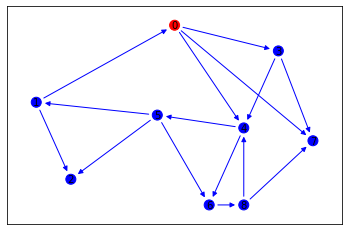

In [14]:
affected = set()
affected_new = set({0})
used_edge = set()
draw(G, affected|affected_new, used_edge)

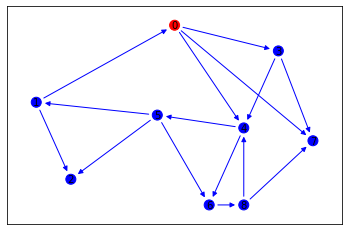

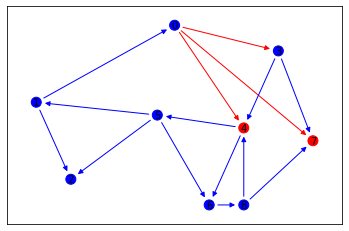

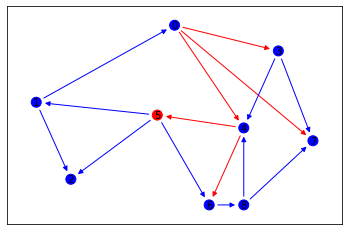

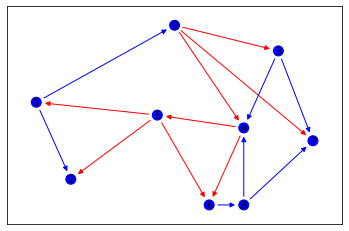

In [18]:
affected = set()
affected_new = set({0})
used_edge = set()

while len(affected_new)!=0:
  draw(G, affected_new, used_edge)
  temp = set()
  for src in affected_new:
    neighbor = G.neighbors(src)
    for dst in neighbor:
      if (dst not in affected) and (dst not in affected_new):
        p = random.uniform(0,1)
        if p<G.edges[src, dst]["weight"]:
          temp.add(dst)
        used_edge.add((src, dst))
  affected = affected | affected_new
  affected_new = temp
draw(G, affected_new, used_edge)